In [1]:

# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sharpley value
import shap
import lime
import lime.lime_tabular


# stepwise
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



# statics
import scipy.stats as st
import torch

import random 

random.seed(10)


In [5]:
import pickle
#load the model
filename1 = 'C:/Users/11961/Desktop/Honours Project/Code/model/logistic_model.sav'
filename2 = 'C:/Users/11961/Desktop/Honours Project/Code/model/rf.sav'
filename3 = 'C:/Users/11961/Desktop/Honours Project/Code/model/xgb.sav'

logreg_sk = pickle.load(open(filename1, 'rb'))
optimal_rf_clf = pickle.load(open(filename2, 'rb'))
optimal_xgb = pickle.load(open(filename3, 'rb'))

In [7]:
#Load the train and test data
X_train= pd.read_csv("C:/Users/11961/Desktop/Honours Project/Code/dataset/X_test.csv")
X_test= pd.read_csv("C:/Users/11961/Desktop/Honours Project/Code/dataset/X_test.csv")

X_train = X_train.drop(['Unnamed: 0'],axis=1)
X_test = X_test.drop(['Unnamed: 0'],axis=1)

### Idividual explanation

In [8]:
# randomly choose a instance in testing set
choosen_instance = X_test.iloc[:1]# the index should be in the X_test dataset

In [9]:
choosen_instance

limit_bal  sex       age  pay_Sep  pay_Aug  pay_Jul  pay_Jun  pay_May  \
0  -0.828424    0 -1.462993        3        2        2        2        2   

   pay_Apr  bill_amt_Sep  ...  pay_amt_Aug  pay_amt_Jul  pay_amt_Jun  \
0        2      0.140351  ...    -0.100048    -0.279705    -0.148416   

   pay_amt_May  pay_amt_Apr  education_graduate school  education_high school  \
0    -0.229047    -0.293382                          0                      0   

   education_university  marriage_married  marriage_single  
0                     1                 0                1  

[1 rows x 26 columns]

In [10]:
#local explanability of logistic regression
logit_explainer_shap = shap.Explainer(logreg_sk,X_train)
shap_values_local = logit_explainer_shap.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(logit_explainer_shap.expected_value, shap_values_local, choosen_instance)

In [11]:
# features and related Shapley values
#The matrix returned from a call to shap_values(X) is exactly parallel to X (same shape and layout).
#https://github.com/shap/shap/issues/658
d={'Feature':choosen_instance.columns ,'Contribution': shap_values_local.squeeze()}
shap_logit_df=pd.DataFrame(data=d)
shap_logit_df

Feature  Contribution
0                   limit_bal      0.086468
1                         sex     -0.032844
2                         age     -0.058708
3                     pay_Sep      1.501127
4                     pay_Aug      0.131374
5                     pay_Jul      0.124785
6                     pay_Jun      0.077020
7                     pay_May      0.019913
8                     pay_Apr      0.007627
9                bill_amt_Sep     -0.068754
10               bill_amt_Aug      0.000803
11               bill_amt_Jul      0.044957
12               bill_amt_Jun      0.001361
13               bill_amt_May     -0.003892
14               bill_amt_Apr     -0.001588
15                pay_amt_Sep      0.081048
16                pay_amt_Aug      0.019448
17                pay_amt_Jul      0.007727
18                pay_amt_Jun      0.000664
19                pay_amt_May      0.003497
20                pay_amt_Apr      0.014229
21  education_graduate school     -0.367152
22      education_high school     -0.141630
23       education_university      0.509088
24           marriage_married     -0.146350
25            marriage_single      0.058363

In [12]:
#local explanability of Random Forest
rf_explainer_shap=shap.Explainer(optimal_rf_clf,X_train)
shap_values_local = rf_explainer_shap.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(rf_explainer_shap.expected_value[1], shap_values_local[1], choosen_instance)

In [13]:
# features and related Shapley values
d={'Feature':choosen_instance.columns ,'Contribution': shap_values_local[1].squeeze()}
shap_rf_df=pd.DataFrame(data=d)
shap_rf_df

Feature  Contribution
0                   limit_bal      0.015250
1                         sex     -0.000546
2                         age     -0.017732
3                     pay_Sep      0.189288
4                     pay_Aug      0.081631
5                     pay_Jul      0.031771
6                     pay_Jun      0.041850
7                     pay_May      0.032650
8                     pay_Apr      0.023379
9                bill_amt_Sep      0.001706
10               bill_amt_Aug      0.002818
11               bill_amt_Jul      0.005005
12               bill_amt_Jun      0.007554
13               bill_amt_May      0.004790
14               bill_amt_Apr      0.009460
15                pay_amt_Sep      0.010022
16                pay_amt_Aug      0.000006
17                pay_amt_Jul      0.009612
18                pay_amt_Jun      0.000961
19                pay_amt_May      0.002622
20                pay_amt_Apr      0.008934
21  education_graduate school     -0.000136
22      education_high school      0.000760
23       education_university      0.000001
24           marriage_married      0.000023
25            marriage_single     -0.000188

In [14]:
#local explanability of XGBoosting
xgb_train=X_train.copy()
xgb_train.iloc[:,21:26]=xgb_train.iloc[:,21:26].astype('int64')
xgb_train.iloc[:,3:9]=xgb_train.iloc[:,3:9].astype('int64')
xgb_train.iloc[:,1]=xgb_train.iloc[:,1].astype('int64')

xgb_test = X_test.copy()
xgb_test.iloc[:,21:26]=xgb_test.iloc[:,21:26].astype('int64')
xgb_test.iloc[:,3:9]=xgb_test.iloc[:,3:9].astype('int64')
xgb_test.iloc[:,1]=xgb_test.iloc[:,1].astype('int64')

In [15]:

xgb_explainer_shap=shap.Explainer(optimal_xgb,xgb_train)
shap_values_local = xgb_explainer_shap.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(xgb_explainer_shap.expected_value, shap_values_local, choosen_instance)#base value is a negative value

In [16]:
# features and related Shapley values
d={'Feature':choosen_instance.columns ,'Contribution': shap_values_local.squeeze()}
shap_xgb_df=pd.DataFrame(data=d)
shap_xgb_df

Feature  Contribution
0                   limit_bal      0.058401
1                         sex     -0.006355
2                         age     -0.118971
3                     pay_Sep      0.824751
4                     pay_Aug      0.227722
5                     pay_Jul      0.132035
6                     pay_Jun      0.123395
7                     pay_May      0.171193
8                     pay_Apr      0.076794
9                bill_amt_Sep      0.025614
10               bill_amt_Aug     -0.020230
11               bill_amt_Jul      0.000895
12               bill_amt_Jun      0.003861
13               bill_amt_May     -0.006924
14               bill_amt_Apr      0.012710
15                pay_amt_Sep      0.042545
16                pay_amt_Aug     -0.018128
17                pay_amt_Jul      0.040694
18                pay_amt_Jun      0.020592
19                pay_amt_May      0.009850
20                pay_amt_Apr      0.049669
21  education_graduate school     -0.002967
22      education_high school      0.004729
23       education_university      0.003560
24           marriage_married     -0.011585
25            marriage_single     -0.004037

In [17]:
#LIME for logistic rgression

explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False,random_state=0)
exp = explainer_lime.explain_instance(X_test.iloc[0], logreg_sk.predict_proba,num_features=26)
exp.show_in_notebook(show_table=True)

Intercept 0.4585962246775495
Prediction_local [0.84343528]
Right: 0.8552162119622178


X does not have valid feature names, but LogisticRegression was fitted with feature names


In [18]:
# features and related LIME coefficients
lime_logit_df=pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])
lime_logit_df

Feature  Contribution
0                     pay_Sep      0.112695
1   education_graduate school      0.107164
2        education_university      0.103185
3                 pay_amt_Aug     -0.083588
4       education_high school      0.068390
5                bill_amt_Sep     -0.066079
6                 pay_amt_Sep     -0.039702
7                bill_amt_Jul      0.038902
8            marriage_married      0.026451
9                   limit_bal     -0.023797
10                pay_amt_Jun     -0.019543
11                    pay_Aug      0.014680
12                    pay_Jul      0.013798
13                pay_amt_Apr     -0.011601
14               bill_amt_Jun     -0.011140
15            marriage_single      0.010065
16               bill_amt_May      0.009097
17                pay_amt_May     -0.008917
18                        age      0.008727
19                    pay_Jun      0.008524
20                        sex      0.006308
21               bill_amt_Apr      0.005394
22                pay_amt_Jul     -0.003920
23                    pay_May      0.001481
24               bill_amt_Aug      0.001086
25                    pay_Apr      0.000014

In [19]:
#LIME
#Random forest
import lime
import lime.lime_tabular
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False,random_state=0)
exp = explainer_lime.explain_instance(X_test.iloc[0], optimal_rf_clf.predict_proba,num_features=26)
exp.show_in_notebook(show_table=True)

Intercept 0.32743365421119713
Prediction_local [0.58791083]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [20]:
# features and related LIME coefficients
lime_rf_df=pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])
lime_rf_df

Feature  Contribution
0                     pay_Sep      0.045927
1                   limit_bal     -0.023576
2                 pay_amt_Aug     -0.022365
3                 pay_amt_Sep     -0.019014
4                 pay_amt_Jul     -0.014730
5                     pay_Aug      0.014158
6                     pay_Jul      0.013323
7                 pay_amt_Apr     -0.010487
8                     pay_Apr      0.009148
9                     pay_Jun      0.008747
10                pay_amt_Jun     -0.007680
11                pay_amt_May     -0.007652
12                    pay_May      0.007165
13               bill_amt_Aug      0.006099
14               bill_amt_Sep      0.003623
15            marriage_single     -0.002252
16               bill_amt_Apr      0.002103
17                        age     -0.001524
18               bill_amt_May     -0.000897
19       education_university      0.000841
20                        sex      0.000672
21               bill_amt_Jul     -0.000369
22      education_high school     -0.000232
23  education_graduate school      0.000184
24           marriage_married     -0.000176
25               bill_amt_Jun      0.000019

In [21]:
#LIME
#XGBoosting
import lime
import lime.lime_tabular
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False,random_state=0)
exp = explainer_lime.explain_instance(X_test.iloc[0], optimal_xgb.predict_proba,num_features=26)
exp.show_in_notebook(show_table=True)

Intercept 0.32681439275321655
Prediction_local [0.61766272]
Right: 0.74462646


In [22]:
lime_xgb_df=pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])
lime_xgb_df

Feature  Contribution
0                     pay_Sep      0.057565
1                   limit_bal     -0.023537
2                     pay_Jul      0.015652
3                 pay_amt_Aug     -0.015402
4                     pay_Aug      0.014872
5                 pay_amt_Sep     -0.013479
6                     pay_Jun      0.013258
7                 pay_amt_Jul     -0.009593
8                 pay_amt_Apr     -0.008959
9                     pay_Apr      0.008430
10                    pay_May      0.007580
11                pay_amt_May     -0.004456
12               bill_amt_Apr      0.003114
13                        sex      0.002859
14                pay_amt_Jun     -0.002764
15               bill_amt_Jul      0.002671
16           marriage_married      0.002401
17               bill_amt_Aug      0.002009
18            marriage_single     -0.001503
19       education_university      0.001272
20                        age      0.001093
21  education_graduate school      0.000980
22               bill_amt_Sep      0.000831
23               bill_amt_May     -0.000808
24               bill_amt_Jun      0.000435
25      education_high school      0.000285

## Correlation between SHAP and LIME - Individual

### Logistic Regression

In [23]:
# shapley values and LIME coefficients of logitic regression
logit_df=pd.merge(shap_logit_df, lime_logit_df, left_on='Feature', right_on='Feature', how='left')
logit_df=logit_df.rename(columns={"Contribution_x": "shap_con", "Contribution_y": "lime_con"})
logit_df['logit_coef']=logreg_sk.coef_.squeeze()
logit_df

Feature  shap_con  lime_con  logit_coef
0                   limit_bal  0.086468 -0.023797   -0.119860
1                         sex -0.032844  0.006308    0.072986
2                         age -0.058708  0.008727    0.039967
3                     pay_Sep  1.501127  0.112695    0.514085
4                     pay_Aug  0.131374  0.014680    0.061969
5                     pay_Jul  0.124785  0.013798    0.058861
6                     pay_Jun  0.077020  0.008524    0.035823
7                     pay_May  0.019913  0.001481    0.009219
8                     pay_Apr  0.007627  0.000014    0.003345
9                bill_amt_Sep -0.068754 -0.066079   -0.340138
10               bill_amt_Aug  0.000803  0.001086    0.004730
11               bill_amt_Jul  0.044957  0.038902    0.193221
12               bill_amt_Jun  0.001361 -0.011140   -0.057757
13               bill_amt_May -0.003892  0.009097    0.047879
14               bill_amt_Apr -0.001588  0.005394    0.031431
15                pay_amt_Sep  0.081048 -0.039702   -0.204955
16                pay_amt_Aug  0.019448 -0.083588   -0.371113
17                pay_amt_Jul  0.007727 -0.003920   -0.021781
18                pay_amt_Jun  0.000664 -0.019543   -0.092633
19                pay_amt_May  0.003497 -0.008917   -0.041025
20                pay_amt_Apr  0.014229 -0.011601   -0.060670
21  education_graduate school -0.367152  0.107164    1.147351
22      education_high school -0.141630  0.068390    0.944197
23       education_university  0.509088  0.103185    1.060599
24           marriage_married -0.146350  0.026451    0.281443
25            marriage_single  0.058363  0.010065    0.110120

In [24]:
#logit
corr = logit_df.iloc[:,1:4].corr()
corr.style.background_gradient(cmap='coolwarm')

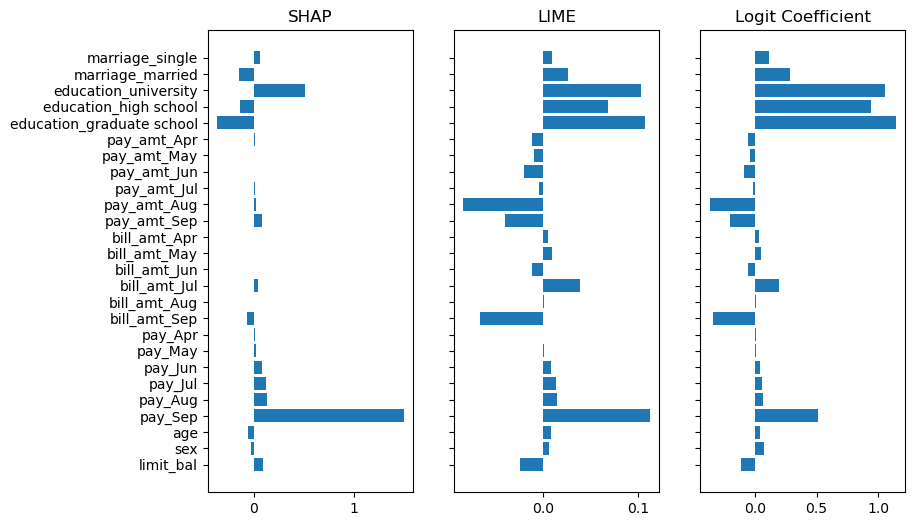

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(9, 6)) 
axs[0].barh(logit_df['Feature'], logit_df['shap_con'])
axs[1].barh(logit_df['Feature'], logit_df['lime_con'])
axs[1].set_yticklabels([])
axs[2].barh(logit_df['Feature'], logit_df['logit_coef'])
axs[2].set_yticklabels([])
axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME')
axs[2].title.set_text('Logit Coefficient')
plt.show()
#lime is more similar to the logit coefficient

In [28]:
logit_df2=pd.merge(shap_logit_df, lime_logit_df, left_on='Feature', right_on='Feature', how='left')
logit_df2=logit_df2.rename(columns={"Contribution_x": "shap_con", "Contribution_y": "lime_fi"})
logit_df2['logit_fi']=logreg_sk.coef_.squeeze()*(X_test.iloc[0].values)
logit_df2['lime_fi']=logit_df2.iloc[:,2]*(X_test.iloc[0].values)
logit_df2

Feature  shap_con   lime_fi  logit_fi
0                   limit_bal  0.086468  0.019714  0.099295
1                         sex -0.032844  0.000000  0.000000
2                         age -0.058708 -0.012767 -0.058472
3                     pay_Sep  1.501127  0.338086  1.542254
4                     pay_Aug  0.131374  0.029360  0.123938
5                     pay_Jul  0.124785  0.027595  0.117722
6                     pay_Jun  0.077020  0.017048  0.071647
7                     pay_May  0.019913  0.002962  0.018438
8                     pay_Apr  0.007627  0.000028  0.006690
9                bill_amt_Sep -0.068754 -0.009274 -0.047739
10               bill_amt_Aug  0.000803  0.000165  0.000717
11               bill_amt_Jul  0.044957  0.007113  0.035329
12               bill_amt_Jun  0.001361  0.000619  0.003211
13               bill_amt_May -0.003892 -0.001531 -0.008060
14               bill_amt_Apr -0.001588 -0.000735 -0.004281
15                pay_amt_Sep  0.081048  0.013552  0.069959
16                pay_amt_Aug  0.019448  0.008363  0.037129
17                pay_amt_Jul  0.007727  0.001097  0.006092
18                pay_amt_Jun  0.000664  0.002900  0.013748
19                pay_amt_May  0.003497  0.002042  0.009397
20                pay_amt_Apr  0.014229  0.003403  0.017799
21  education_graduate school -0.367152  0.000000  0.000000
22      education_high school -0.141630  0.000000  0.000000
23       education_university  0.509088  0.103185  1.060599
24           marriage_married -0.146350  0.000000  0.000000
25            marriage_single  0.058363  0.010065  0.110120

In [29]:
#logit
corr = logit_df2.iloc[:,1:4].corr()
corr.style.background_gradient(cmap='coolwarm')

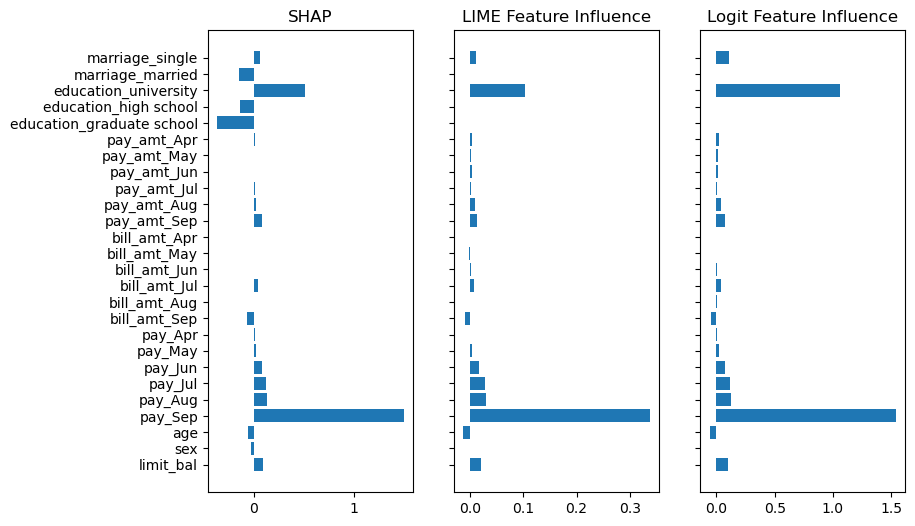

In [30]:

fig, axs = plt.subplots(1, 3, figsize=(9,6)) 
axs[0].barh(logit_df2['Feature'], logit_df2['shap_con'])
axs[1].barh(logit_df2['Feature'], logit_df2['lime_fi'])
axs[2].barh(logit_df2['Feature'], logit_df2['logit_fi'])
axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME Feature Influence')
axs[2].title.set_text('Logit Feature Influence')
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
plt.show()
#lime is more similar to 

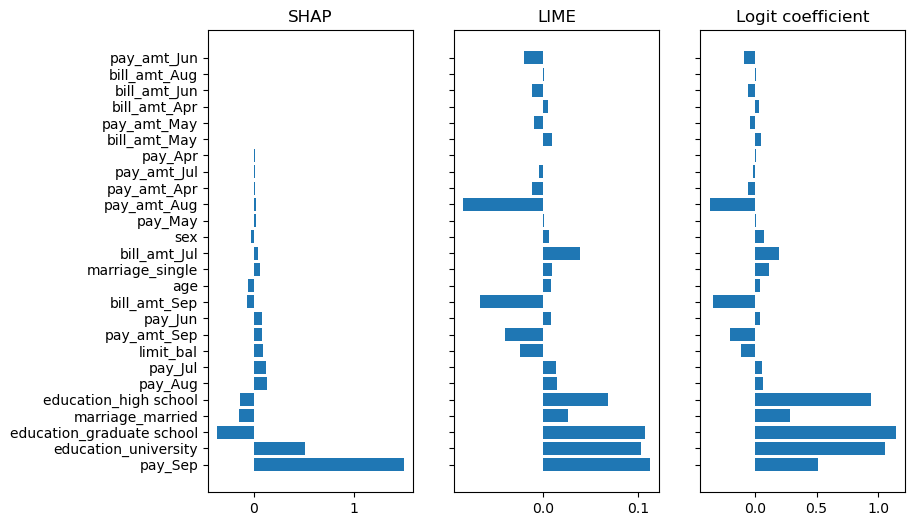

In [33]:
# Feature importance ranked
shap_sort=logit_df.reindex(logit_df.shap_con.abs().sort_values(ascending=False).index)
#lime_sort = logit_df.reindex(logit_df.lime_con.abs().sort_values(ascending=False).index)
#coef_sort = logit_df.reindex(logit_df.logit_coef.abs().sort_values(ascending=False).index)
fig, axs = plt.subplots(1, 3, figsize=(9,6)) 
axs[0].barh(shap_sort['Feature'], shap_sort['shap_con'])
axs[1].barh(lime_sort['Feature'], shap_sort['lime_con'])
axs[2].barh(lime_sort['Feature'], shap_sort['logit_coef'])
axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME')
axs[2].title.set_text('Logit coefficient')
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
plt.show()

### Random Forest

In [34]:
rf_df=pd.merge(shap_rf_df, lime_rf_df, left_on='Feature', right_on='Feature', how='left')
rf_df=rf_df.rename(columns={"Contribution_x": "shap_con", "Contribution_y": "lime_con"})
rf_df

Feature  shap_con  lime_con
0                   limit_bal  0.015250 -0.023576
1                         sex -0.000546  0.000672
2                         age -0.017732 -0.001524
3                     pay_Sep  0.189288  0.045927
4                     pay_Aug  0.081631  0.014158
5                     pay_Jul  0.031771  0.013323
6                     pay_Jun  0.041850  0.008747
7                     pay_May  0.032650  0.007165
8                     pay_Apr  0.023379  0.009148
9                bill_amt_Sep  0.001706  0.003623
10               bill_amt_Aug  0.002818  0.006099
11               bill_amt_Jul  0.005005 -0.000369
12               bill_amt_Jun  0.007554  0.000019
13               bill_amt_May  0.004790 -0.000897
14               bill_amt_Apr  0.009460  0.002103
15                pay_amt_Sep  0.010022 -0.019014
16                pay_amt_Aug  0.000006 -0.022365
17                pay_amt_Jul  0.009612 -0.014730
18                pay_amt_Jun  0.000961 -0.007680
19                pay_amt_May  0.002622 -0.007652
20                pay_amt_Apr  0.008934 -0.010487
21  education_graduate school -0.000136  0.000184
22      education_high school  0.000760 -0.000232
23       education_university  0.000001  0.000841
24           marriage_married  0.000023 -0.000176
25            marriage_single -0.000188 -0.002252

In [35]:
corr = rf_df.iloc[:,1:4].corr()
corr.style.background_gradient(cmap='coolwarm')

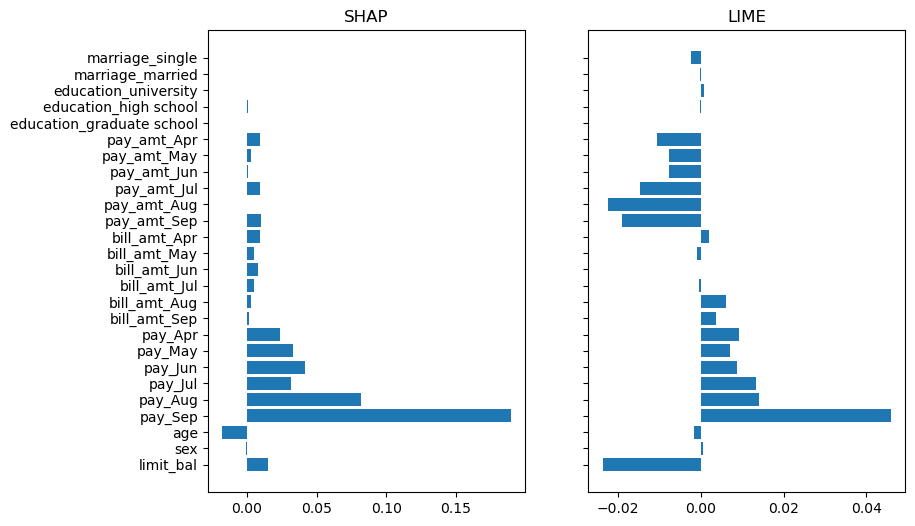

In [36]:

fig, axs = plt.subplots(1, 2, figsize=(9,6)) 
axs[0].barh(rf_df['Feature'], rf_df['shap_con'])
axs[1].barh(rf_df['Feature'], rf_df['lime_con'])

axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME')
axs[1].set_yticklabels([])
plt.show()


In [49]:
rf_df2=pd.merge(shap_rf_df, lime_rf_df, left_on='Feature', right_on='Feature', how='left')
rf_df2=rf_df2.rename(columns={"Contribution_x": "shap_con", "Contribution_y": "lime_fi"})
rf_df2['lime_fi']=rf_df2.iloc[:,2]*(X_test.iloc[0].values)
rf_df2

Feature  shap_con   lime_fi
0                   limit_bal  0.015072  0.018097
1                         sex -0.000268 -0.000000
2                         age -0.017626  0.002254
3                     pay_Sep  0.168328  0.151937
4                     pay_Aug  0.077355  0.031984
5                     pay_Jul  0.030099  0.029207
6                     pay_Jun  0.036977  0.016396
7                     pay_May  0.031309  0.015812
8                     pay_Apr  0.021445  0.020265
9                bill_amt_Sep  0.004827  0.000770
10               bill_amt_Aug  0.003814  0.001023
11               bill_amt_Jul  0.006446  0.000056
12               bill_amt_Jun  0.008309 -0.000022
13               bill_amt_May  0.003948  0.000017
14               bill_amt_Apr  0.011005 -0.000450
15                pay_amt_Sep  0.005257  0.006309
16                pay_amt_Aug -0.001444  0.002055
17                pay_amt_Jul  0.006133  0.004303
18                pay_amt_Jun  0.002037  0.001209
19                pay_amt_May  0.003858  0.001685
20                pay_amt_Apr  0.006364  0.003082
21  education_graduate school  0.000169 -0.000000
22      education_high school  0.000934 -0.000000
23       education_university  0.000315  0.001028
24           marriage_married  0.000143 -0.000000
25            marriage_single -0.000304 -0.002206

In [50]:
corr = rf_df2.iloc[:,1:4].corr()
corr.style.background_gradient(cmap='coolwarm')

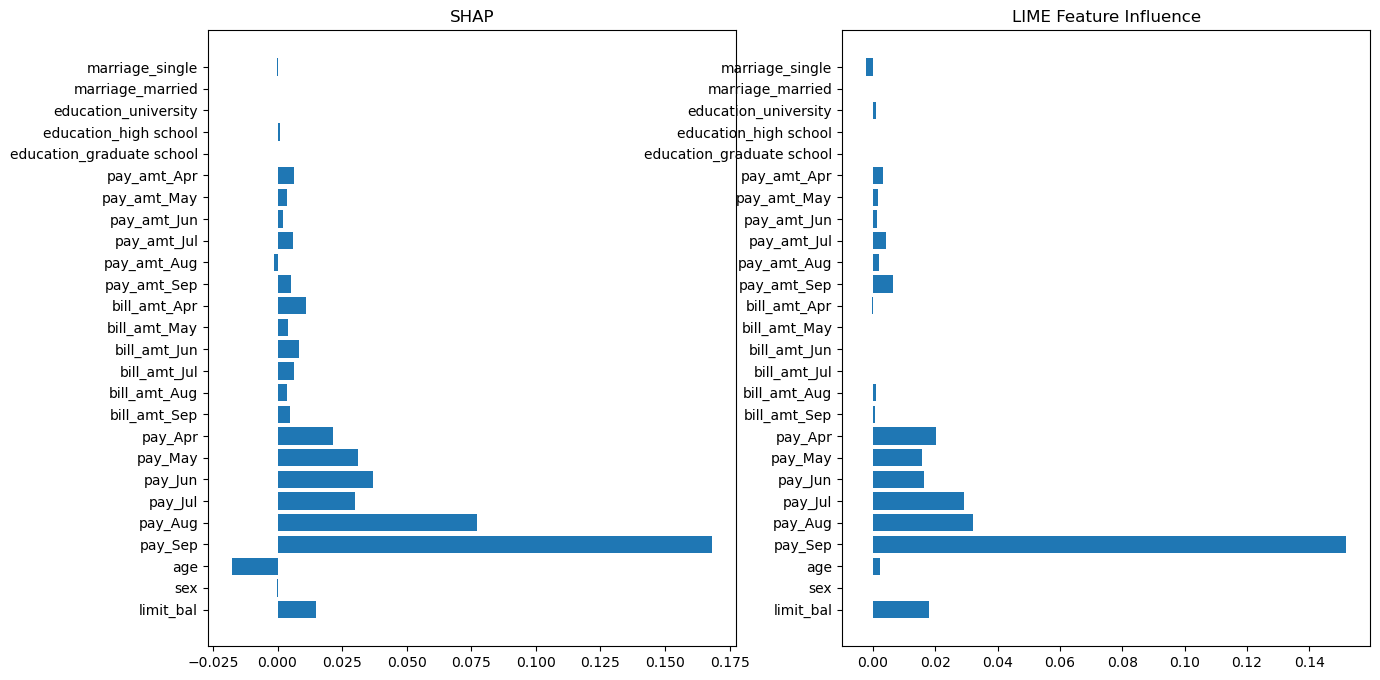

In [51]:

fig, axs = plt.subplots(1, 2, figsize=(15, 8)) 
axs[0].barh(rf_df2['Feature'], rf_df2['shap_con'])
axs[1].barh(rf_df2['Feature'], rf_df2['lime_fi'])

axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME Feature Influence')

plt.show()

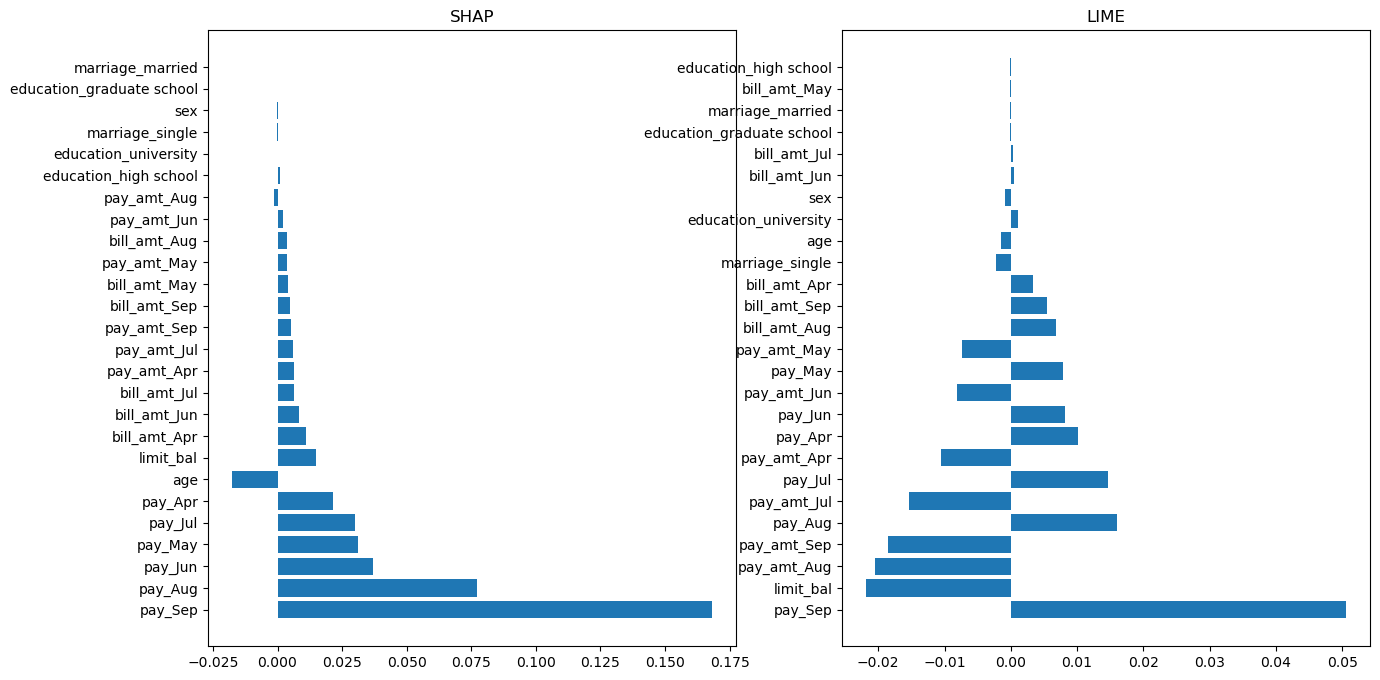

In [52]:
#feature importance ranked
shap_sort=rf_df.reindex(rf_df.shap_con.abs().sort_values(ascending=False).index)
lime_sort = rf_df.reindex(rf_df.lime_con.abs().sort_values(ascending=False).index)
fig, axs = plt.subplots(1, 2, figsize=(15, 8)) 
axs[0].barh(shap_sort['Feature'], shap_sort['shap_con'])
axs[1].barh(lime_sort['Feature'], lime_sort['lime_con'])
axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME')
plt.show()

In [37]:
#XGBoosting
xgb_df=pd.merge(shap_xgb_df, lime_xgb_df, left_on='Feature', right_on='Feature', how='left')
xgb_df=xgb_df.rename(columns={"Contribution_x": "shap_con", "Contribution_y": "lime_con"})
xgb_df

Feature  shap_con  lime_con
0                   limit_bal  0.058401 -0.023537
1                         sex -0.006355  0.002859
2                         age -0.118971  0.001093
3                     pay_Sep  0.824751  0.057565
4                     pay_Aug  0.227722  0.014872
5                     pay_Jul  0.132035  0.015652
6                     pay_Jun  0.123395  0.013258
7                     pay_May  0.171193  0.007580
8                     pay_Apr  0.076794  0.008430
9                bill_amt_Sep  0.025614  0.000831
10               bill_amt_Aug -0.020230  0.002009
11               bill_amt_Jul  0.000895  0.002671
12               bill_amt_Jun  0.003861  0.000435
13               bill_amt_May -0.006924 -0.000808
14               bill_amt_Apr  0.012710  0.003114
15                pay_amt_Sep  0.042545 -0.013479
16                pay_amt_Aug -0.018128 -0.015402
17                pay_amt_Jul  0.040694 -0.009593
18                pay_amt_Jun  0.020592 -0.002764
19                pay_amt_May  0.009850 -0.004456
20                pay_amt_Apr  0.049669 -0.008959
21  education_graduate school -0.002967  0.000980
22      education_high school  0.004729  0.000285
23       education_university  0.003560  0.001272
24           marriage_married -0.011585  0.002401
25            marriage_single -0.004037 -0.001503

In [38]:
#xgb
corr = xgb_df.iloc[:,1:3].corr()
corr.style.background_gradient(cmap='coolwarm')

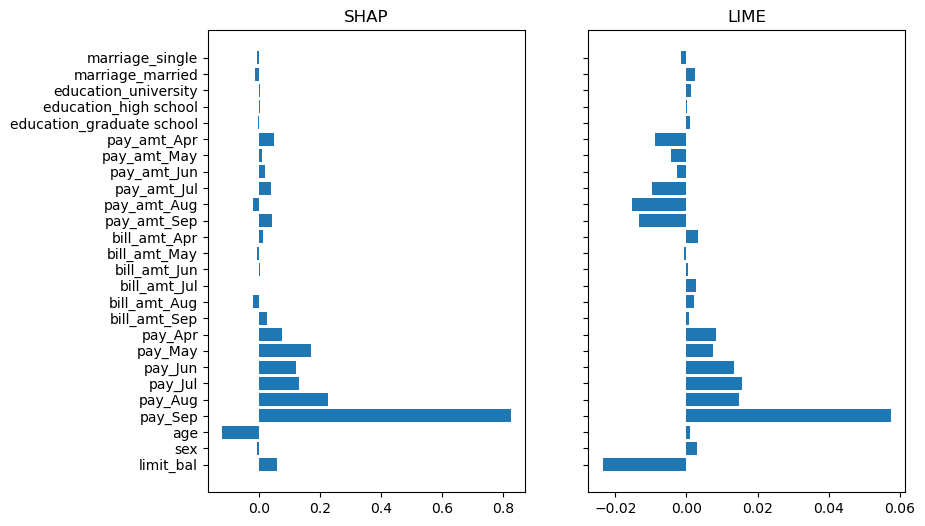

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(9,6)) 
axs[0].barh(xgb_df['Feature'], xgb_df['shap_con'])
axs[1].barh(xgb_df['Feature'], xgb_df['lime_con'])

axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME')
axs[1].set_yticklabels([])
plt.show()

In [56]:
xgb_df2=pd.merge(shap_xgb_df, lime_xgb_df, left_on='Feature', right_on='Feature', how='left')
xgb_df2=xgb_df2.rename(columns={"Contribution_x": "shap_con", "Contribution_y": "lime_fi"})
xgb_df2['lime_fi']=xgb_df2.iloc[:,2]*(X_test.iloc[0].values)
xgb_df2

Feature  shap_con   lime_fi
0                   limit_bal  0.054999  0.018934
1                         sex -0.006478  0.000000
2                         age -0.120037 -0.001710
3                     pay_Sep  0.733542  0.193850
4                     pay_Aug  0.212245  0.036526
5                     pay_Jul  0.125010  0.034347
6                     pay_Jun  0.112338  0.027415
7                     pay_May  0.161902  0.015143
8                     pay_Apr  0.066681  0.019009
9                bill_amt_Sep  0.033071  0.000321
10               bill_amt_Aug -0.024108  0.000365
11               bill_amt_Jul -0.001006  0.000533
12               bill_amt_Jun  0.003179  0.000020
13               bill_amt_May -0.010506  0.000162
14               bill_amt_Apr  0.008808 -0.000493
15                pay_amt_Sep  0.034504  0.004755
16                pay_amt_Aug -0.021178  0.001410
17                pay_amt_Jul  0.031678  0.003038
18                pay_amt_Jun  0.025945  0.000460
19                pay_amt_May  0.019564  0.000870
20                pay_amt_Apr  0.036704  0.002565
21  education_graduate school -0.002601  0.000000
22      education_high school  0.005240  0.000000
23       education_university  0.003679  0.001160
24           marriage_married -0.010075  0.000000
25            marriage_single -0.003321 -0.001718

In [57]:
#xgb
corr = xgb_df2.iloc[:,1:3].corr()
corr.style.background_gradient(cmap='coolwarm')

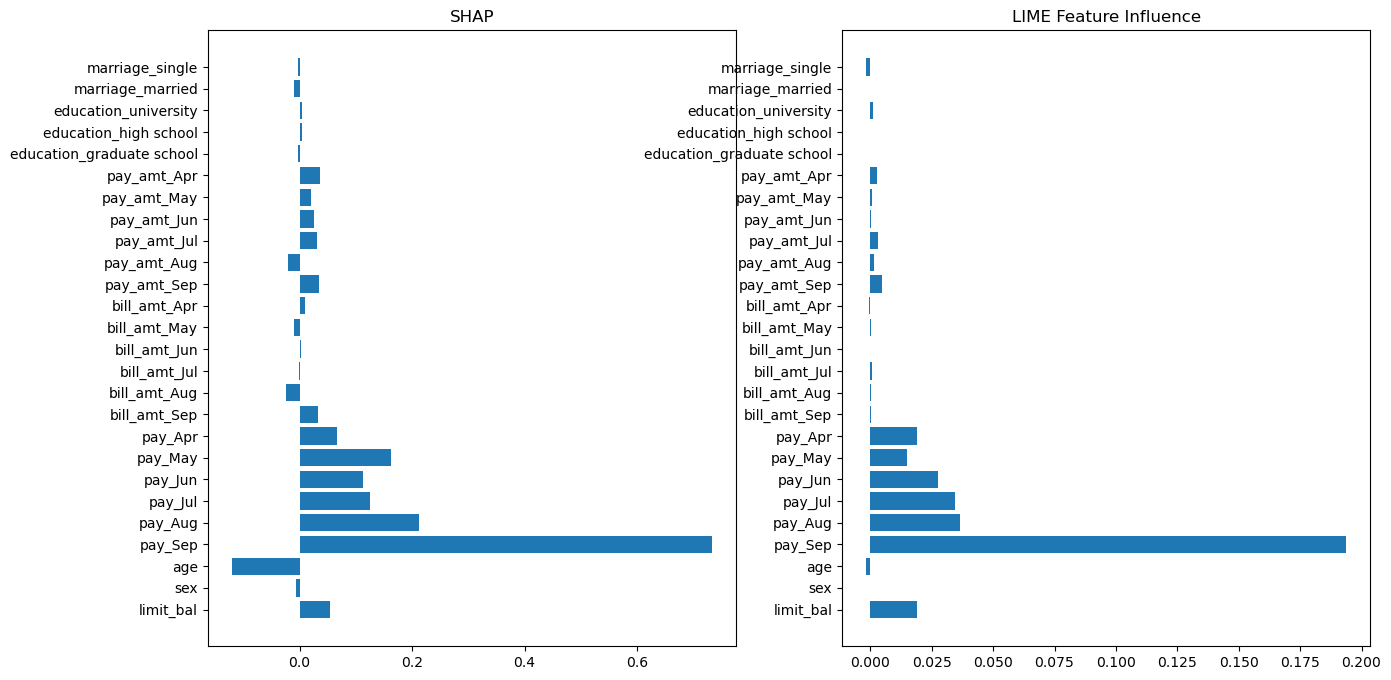

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8)) 
axs[0].barh(xgb_df2['Feature'], xgb_df2['shap_con'])
axs[1].barh(xgb_df2['Feature'], xgb_df2['lime_fi'])

axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME Feature Influence')

plt.show()

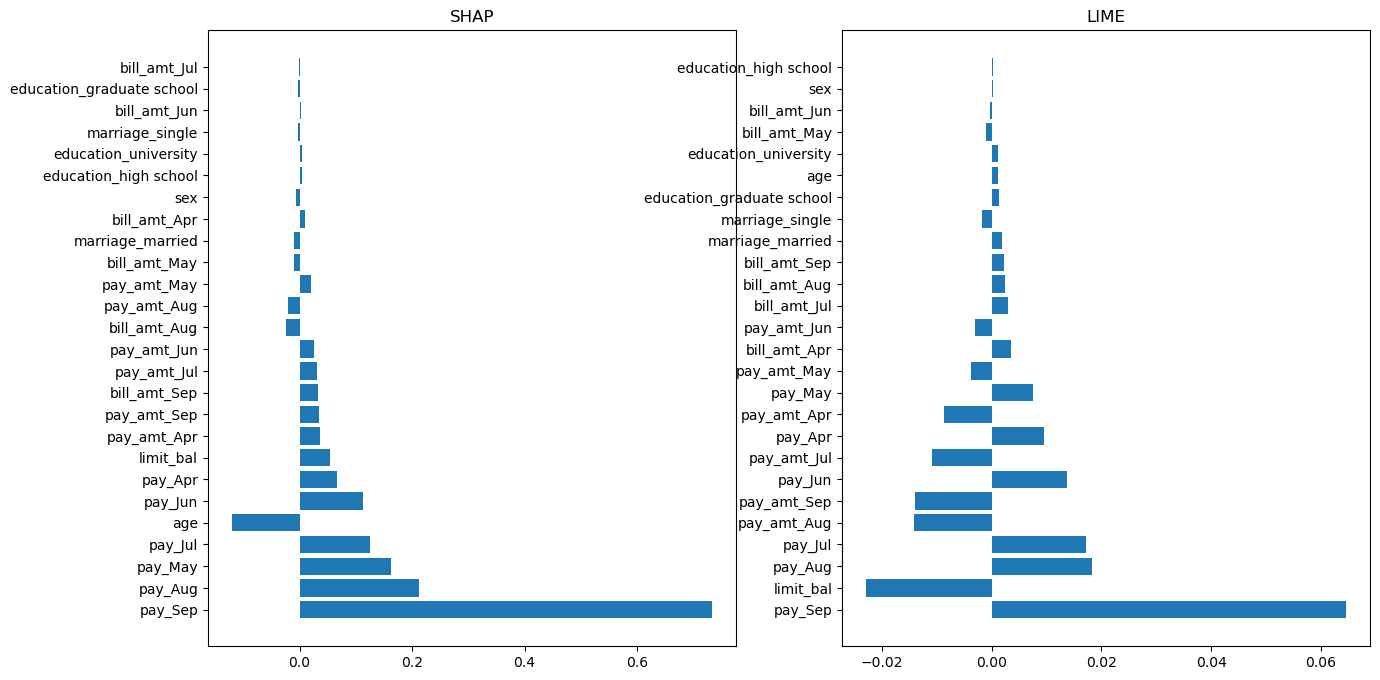

In [59]:
# feature importance ranked
shap_sort=xgb_df.reindex(xgb_df.shap_con.abs().sort_values(ascending=False).index)
lime_sort = xgb_df.reindex(xgb_df.lime_con.abs().sort_values(ascending=False).index)
fig, axs = plt.subplots(1, 2, figsize=(15, 8)) 
axs[0].barh(shap_sort['Feature'], shap_sort['shap_con'])
axs[1].barh(lime_sort['Feature'], lime_sort['lime_con'])
axs[0].title.set_text('SHAP')
axs[1].title.set_text('LIME')
plt.show()

In [60]:
logit_df.to_csv('./logit_indi_exp.csv')
rf_df.to_csv('./rf_indi_exp.csv')
xgb_df.to_csv('./xgb_indi_exp.csv')

## Result

### SHAP

#### pay_sep is the most important feature in both 3 models. 
#### RF and XGB have more similar ranking compared to LR
#### Education and marriage status are important in LR, but have insignificant influence in RF and XGB

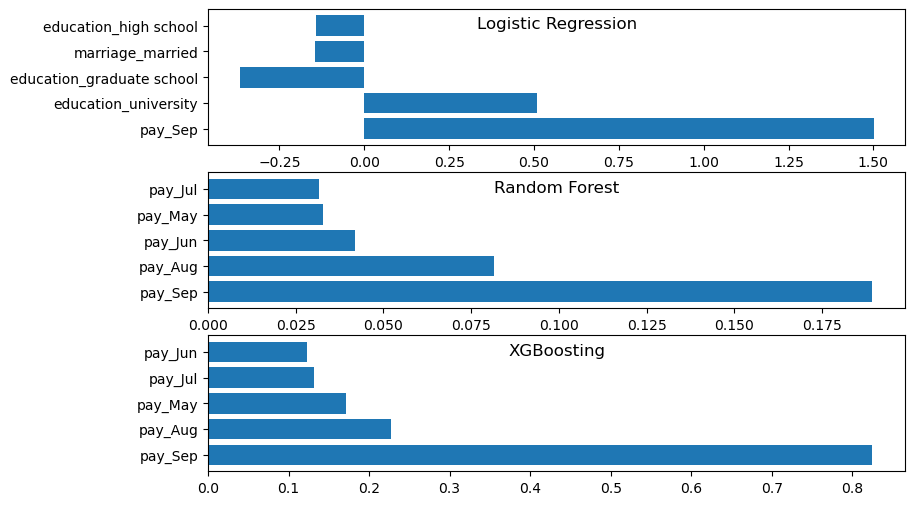

In [71]:
#SHAP
shap_sort_logit=logit_df.reindex(logit_df.shap_con.abs().sort_values(ascending=False).index)
shap_sort_rf=rf_df.reindex(rf_df.shap_con.abs().sort_values(ascending=False).index)
shap_sort_xgb=xgb_df.reindex(xgb_df.shap_con.abs().sort_values(ascending=False).index)

fig, axs = plt.subplots(3,1, figsize=(9,6)) 
axs[0].barh(shap_sort_logit['Feature'].iloc[:5], shap_sort_logit['shap_con'].iloc[:5])
axs[1].barh( shap_sort_rf['Feature'].iloc[:5],shap_sort_rf['shap_con'].iloc[:5])
axs[2].barh(shap_sort_xgb['Feature'].iloc[:5],shap_sort_xgb['shap_con'].iloc[:5])
axs[0].set_title('Logistic Regression',y=1.0, pad=-14)
axs[1].set_title('Random Forest',y=1.0, pad=-14)
axs[2].set_title('XGBoosting',y=1.0, pad=-14)
plt.show()

### LIME

#### Reveals the same pattern as SHAP
#### negative values increases

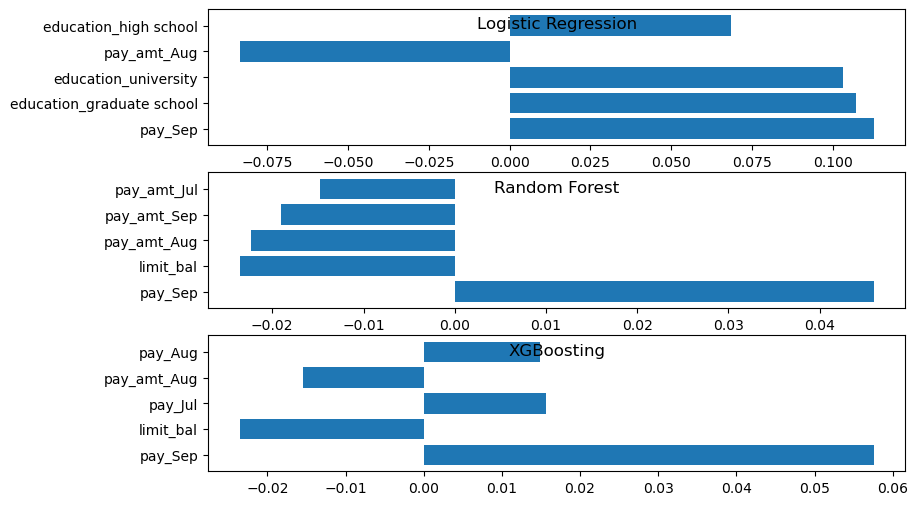

In [72]:
#LIME
lime_sort_logit=logit_df.reindex(logit_df.lime_con.abs().sort_values(ascending=False).index)
lime_sort_rf=rf_df.reindex(rf_df.lime_con.abs().sort_values(ascending=False).index)
lime_sort_xgb=xgb_df.reindex(xgb_df.lime_con.abs().sort_values(ascending=False).index)

fig, axs = plt.subplots(3,1, figsize=(9,6)) 
axs[0].barh(lime_sort_logit['Feature'].iloc[:5], lime_sort_logit['lime_con'].iloc[:5])
axs[1].barh( lime_sort_rf['Feature'].iloc[:5],lime_sort_rf['lime_con'].iloc[:5])
axs[2].barh(lime_sort_xgb['Feature'].iloc[:5],lime_sort_xgb['lime_con'].iloc[:5])
axs[0].set_title('Logistic Regression',y=1.0, pad=-14)
axs[1].set_title('Random Forest',y=1.0, pad=-14)
axs[2].set_title('XGBoosting',y=1.0, pad=-14)
plt.show()



#### RF and XGB explanations are strongly linear correlated
#### LR SHAP values are strongly linear correlated with RF and XGB, but LIME values are not

In [50]:
#compare the explanation between three models
d={'Feature':logit_df['Feature'],'logistic regression':logit_df['shap_con'],'random forest': rf_df['shap_con'],'xgboosting':xgb_df['shap_con']}
shap_df = pd.DataFrame(data=d)
corr = shap_df.iloc[:,1:4].corr()
corr.style.background_gradient(cmap='coolwarm')

In [51]:
#compare the explanation between three models
d={'Feature':logit_df['Feature'],'logistic regression':logit_df['lime_con'],'random forest': rf_df['lime_con'],'xgboosting':xgb_df['lime_con']}
lime_df = pd.DataFrame(data=d)
corr = lime_df.iloc[:,1:4].corr()
corr.style.background_gradient(cmap='coolwarm')

#### LR: no strong linear correlation between SHAP and LIME values, but LIME values are strongly correlated with logit coefficients
#### RF and XGB: SHAP and LIME values are strongly linearly correlated
#### If we multiply linear coefficients or LIME values with related feature values, they will be strongly linearly correlated with SHAP values across all models. 